## Programming Exercise 1 - Linear Regression

- [warmUpExercise](#warmUpExercise)
- [2. Linear regression with one variable](#2)
- [2.1 Plotting the Data](#2.1)
- [2.2 Gradient Descent](#2.2)

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

#### warmUpExercise

In [80]:
def warmUpExercise():
    return(np.identity(5))

In [81]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

<a name ='2'></a>
# 2. Linear regression with one variable 

<a name ='2.1'></a>
## 2.1 Plotting the Data

Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). (Many other problems that you will encounter in real life are multi-dimensional and can’t be plotted on a 2-d plot.)
In ex1.m, the dataset is loaded from the data file into the variables X and y:

### Using Numpy

In [82]:
data = np.loadtxt('data/ex1data1.txt', delimiter=',')
x = data[:,0]
y = data[:,1]
y

array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.82

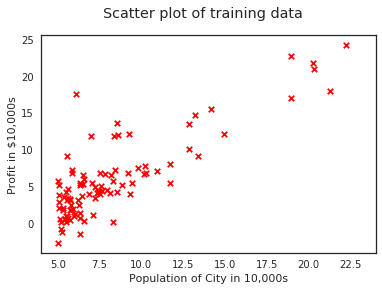

In [83]:
plt.scatter(x, y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');
plt.suptitle('Scatter plot of training data')
plt.show()

<a name ='2.2'></a>
## 2.2 Gradient Descent
In this part, you will fit the linear regression parameters θ to our dataset
using gradient descent.

<a name ='2.2.1'></a>
### 2.2.1 Update Equations

The objective of linear regression is to minimize the cost function:

$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta} (x^{(i)} - y^{(i)})^{2}$

where the hypothesis $h\theta (x)$ is given by the linear model

$h_{\theta} (x) = \theta^{T} x = \theta_{0} + \theta_{1} x_{1}$

Recall that the parameters of your model are the $\theta_{j}$ values. These are the values you will adjust to minimize cost $J(\theta)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update

$\theta j := \theta_{j} − \alpha \frac{1}{m} \sum_{i=1}^{m} (h_{\theta} (x^{(i)} ) − y^{(i)}) x_{j}^{(i)}$
(simultaneously update $\theta j$ for all $j$).

With each step of gradient descent, your parameters $\theta_{j}$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$.

**Implementation Note**:
We store each example as a row in the the `X` matrix in ~~Octave/MATLAB~~ Python. To take into account the intercept term $(\theta_{0})$, we add an additional first column to `X` and set it to all ones. This allows us to treat $\theta_{0}$ as simply another ‘feature’.

<a name ='2.2.2'></a>
### 2.2.2 Implementation
In `ex1.m`, we have already set up the data for linear regression. In the following lines, we add another dimension to our data to accommodate the $\theta_{0}$ intercept term. We also initialize the initial parameters = $0$ and the learning rate $\alpha$ = `alpha` = `0.01`.
```
X = [ones(m, 1), data(:,1)]; % Add a column of ones to x
theta = zeros(2, 1); % initialize fitting parameters
iterations = 1500;
alpha = 0.01;
```


In [84]:
m = y.size
assert m == data.shape[0]
m

97

In [85]:
X = np.c_[np.ones(m), x]

y = np.c_[y]

print('First 5 elements of X and y:','X[:5] =', X[:5], 'y[:5] =', y[:5], sep='\n\n')

First 5 elements of X and y:

X[:5] =

[[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]
 [1.     7.0032]
 [1.     5.8598]]

y[:5] =

[[17.592 ]
 [ 9.1302]
 [13.662 ]
 [11.854 ]
 [ 6.8233]]


#### initialize fitting parameters

initialize the initial parameters = $0$ and the learning rate $\alpha$ = `alpha` = `0.01`.



In [86]:
theta = np.zeros(2)
iterations = 1500
alpha = 0.01

print('initialize fitting parameters\ntheta=', theta, '\niterations=', iterations, '\nalpha=', alpha)

initialize fitting parameters
theta= [0. 0.] 
iterations= 1500 
alpha= 0.01


### 2.2.3 Computing the cost $J(\theta)$

As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation.

Your next task is to complete the code in the file `computeCost.m`, which is a function that computes $J(\theta)$. As you are doing this, remember that the variables X and y are not scalar values, but matrices whose rows represent
the examples from the training set.

Once you have completed the function, the next step in `ex1.m` will run `computeCost` once using $\theta$ initialized to zeros, and you will see the cost printed to the screen.
You should expect to see a cost of `32.07`.

_You should now submit your solutions._

In [87]:
def computeCost(X, y, theta=[[0],[0]]):
    
    m = y.size
    J = 0
    
    h = X.dot(theta)
    
    J = 1/(2*m)*np.sum(np.square(h-y))
    
    return(J)

In [88]:
computeCost(X,y)

32.072733877455676

### 2.2.4 Gradient descent

Next, you will implement gradient descent in the file `gradientDescent.m`.
The loop structure has been written for you, and you only need to supply
the updates to $\theta$ within each iteration.

As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not `X` and `y`. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing `X` or `y`. Refer to the equations in this handout and to the video lectures if you are uncertain.

A good way to verify that gradient descent is working correctly is to look at the value of $J(\theta)$ and check that it is decreasing with each step. The starter code for `gradientDescent.m` calls `computeCost` on every iteration and prints the cost. Assuming you have implemented gradient descent and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

After you are finished, `ex1.m` will use your final parameters to plot the linear fit. The result should look something like Figure 2:

Your final values for θ will also be used to make predictions on profits in areas of 35,000 and 70,000 people. Note the way that the following lines in ex1.m uses matrix multiplication, rather than explicit summation or loop-
ing, to calculate the predictions. This is an example of code vectorization in
Octave/MATLAB.

_You should now submit your solutions._
```
predict1 = [1, 3.5] * theta;

predict2 = [1, 7] * theta;
```

In [89]:
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J_history[iter] = computeCost(X, y, theta)
        
    return(theta, J_history)

theta:  [-3.63029144  1.16636235]


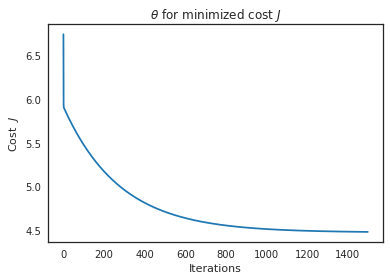

In [112]:
theta, Cost_J = gradientDescent(X, y)

print('theta: ', theta.ravel())

plt.plot(Cost_J)
plt.ylabel(r'Cost  $J$')
plt.xlabel('Iterations');
plt.title(r'$\theta$ for minimized cost $J$') 
# Convergence of gradient descent with an appropriate learning rate
plt.show()

## 2.3 Debugging

Here are some things to keep in mind as you implement gradient descent:
- ~~Octave/MATLAB array indices start from one, not zero.~~ **Python array indices start from zero, not one.** If you’re storing $\theta_{0}$ and $\theta_{1}$ in a vector called `theta`, the values will be `theta(0)` and `theta(1)`.


- If you are seeing many errors at runtime, inspect your matrix operations to **make sure that you’re adding and multiplying matrices of compatible dimensions.** Printing the dimensions of variables with the size command will help you debug.


- By default, Octave/MATLAB interprets math operators to be matrix operators. This is a common source of size incompatibility errors. If you don’t want matrix multiplication, you need to add the `dot` notation to specify this to Octave/MATLAB. For example, `A*B` does a matrix multiply, while `A.*B` does an element-wise multiplication.

Text(0.5,0.98,'Figure 2: Training data with linear regression fit')

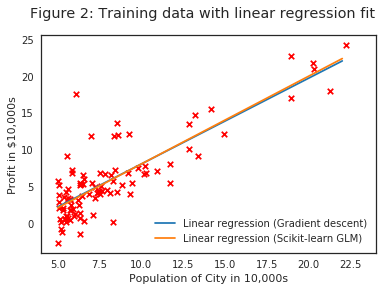

In [94]:
xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx

# Plot gradient descent
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')

# Compare with Scikit-learn Linear regression 
regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression (Scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);
plt.suptitle('Figure 2: Training data with linear regression fit')

In [92]:
# Predict profit for a city with population of 35000 and 70000
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 7])*10000)

[4519.7678677]
[45342.45012945]


## 2.4 Visualizing $J(\theta)$

To understand the cost function $J(\theta)$ better, you will now plot the cost over a 2-dimensional grid of $\theta_{0}$ and $\theta_{1}$ values. You will not need to code anything new for this part, but you should understand how the code you have written already is creating these images.

In the next step of `ex1.m`, there is code set up to calculate $J(\theta)$ over a grid of values using the `computeCost` function that you wrote.

Ater these lines are executed, you will have a 2-D array of $J(\theta)$ values.
The script `ex1.m` will then use these values to produce surface and contour
plots of $J(\theta)$ using the surf and contour commands. The plots should look
something like Figure 3

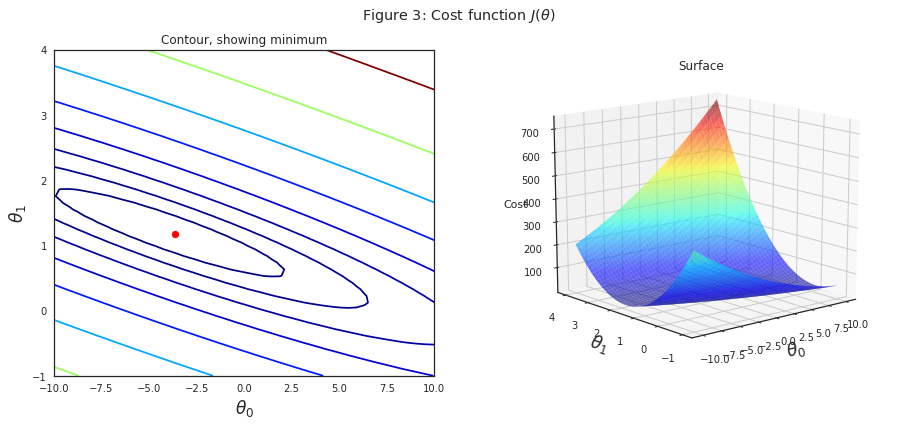

In [100]:
# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = computeCost(X,y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

plt.suptitle(r'Figure 3: Cost function $J(\theta)$')
ax1.set_title('Contour, showing minimum')
ax2.set_title('Surface')

plt.show()

The purpose of these graphs is to show you that how $J(\theta)$ varies with
changes in $\theta_{0}$ and $\theta_{1}$. The cost function $J(\theta)$ is bowl-shaped and has a global
mininum. (This is easier to see in the contour plot than in the 3D surface
plot). This minimum is the optimal point for $\theta_{0}$ and $\theta_{1}$, and each step of
gradient descent moves closer to this point.